# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

# Introduction

Data Preprocessing is a very crucial part of a data analyst job. With 10 folds of data being produced every second in the world means it's very important for a data analyst to take that data and make sense of it. This pre-processing stage of formating the data so is important since without doing so would make it hard for companies to make an informative decision, and create productivity in a business. In addition, with this credit score dataset, we want to explore the data and clean it so it can create a piece of more reliable information when creating a credit score. This way banks can know why they want to give loans in the future and whom to decline based on creditworthines

### Table of Contents

* [Previewing Data](#chapter1)
    * [1 Open the data file and have a look at the general information.](#section_1)
    * [1.1 Dataset Description](#section_1_1)
        * [1.2  Conclusion](#section_1_2)
* [2 Data preprocessing](#section_2)
    * [2.1  Processing missing values](#section_2_1)
    * [2.2  Looking into the data columns and there unique vlaues and total counts](#section_2_2)
        * [2.3  Conclusion](#section_2_3)
    * [2.4  Data type replacement](#section_2_4)
        * [2.5  replacing incorrect outputs](#section_2_5)
            * [2.6  Conclusion](#section_2_6)
    * [2.7  Processing duplicates](#section_2_7)
        * [2.8  Conclusion](#section_2_8)
* [3  Categorizing Data](#section_3)
    * [3.1  Lemmatization](#section_3_1)
        * [3.2  Conclusion](#section_3_2)
* [4  Answer these questions](#section_4)
    * [4.1  Conclusion](#section_4_1)
    * [4.2  Conclusion](#section_4_2)
    * [4.3  Conclusion](#section_4_3)
    * [4.4  Conclusion](#section_4_4)
* [5  General conclusion](#section_5)

# Previewing Data  <a class="anchor" id="chapter1"></a>

## Open the data file and have a look at the general information. <a class="anchor" id="section_1"></a>

In [1]:
# libries
%matplotlib inline
import matplotlib.pyplot as plt # importing the required module
import numpy as np
import pandas as pd
from scipy import stats
import nltk
from nltk.stem import WordNetLemmatizer

In [2]:
try:
    df = pd.read_csv('credit_scoring_eng.csv')
except:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv') 

In [3]:
''' Examining the Data'''
df.head(15)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [4]:
''' Examining the Data'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
df.describe(include = 'all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


In [6]:
df.shape

(21525, 12)

### Dataset Description <a class="anchor" id="section_1_1"></a>

Description of the data

- children: the number of children in the family
- days_employed: how long the customer has been working
- dob_years: the customer’s age
- education: the customer’s education level
- education_id: identifier for the customer’s education
- family_status: the customer’s marital status
- family_status_id: identifier for the customer’s marital status
- gender: the customer’s gender
- income_type: the customer’s income type
- debt: whether the customer has ever defaulted on a loan
- total_income: monthly income
- purpose: reason for taking out a loan

### Conclusion<a class="anchor" id="section_1_2"></a>

From previewing the data we can see that there are missing values present in days_employed, and total_income. In addition, we can see that there might be some input error since days_employed has negative values when they should be positive. Also, the data seems to have duplicates in the education columns. 

## Data preprocessing<a class="anchor" id="section_2"></a>

### Processing missing values<a class="anchor" id="section_2_1"></a>

In [7]:
#checking for sum of missing values
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [8]:
#percentage of missing values
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
print(percent)

total_income        0.100999
days_employed       0.100999
purpose             0.000000
debt                0.000000
income_type         0.000000
gender              0.000000
family_status_id    0.000000
family_status       0.000000
education_id        0.000000
education           0.000000
dob_years           0.000000
children            0.000000
dtype: float64


In [9]:
df.fillna(df.median(),inplace=True)

There are multiple different approaches to filling missing values and each has there own pros and cons for doing so. I took care of missing values in this dataset by filling in the Na's with the median value. I took this approch since just dropping the rows form out dataset can cause a skewness, and using the mean to fill the NA might not be best since outliers which is why I am using the median over the mean. 

In [10]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Looking into the data columns and there unique vlaues and total counts

In [11]:
# look for total counts of unique entry in the 'children' column
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [12]:
# look for total value of entry in the 'days_employed' column
df['days_employed'].value_counts()

-1203.369529    2175
-986.927316        1
-1893.222792       1
-4236.274243       1
-6620.396473       1
                ... 
-2849.351119       1
-5619.328204       1
-448.829898        1
-1687.038672       1
-582.538413        1
Name: days_employed, Length: 19351, dtype: int64

In [13]:
# look for the total counts of unique entry in the 'purpose' column
df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [14]:
# look for total values counts in the 'dob_years' column
df['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [15]:
# look for total counts for unique entry in the 'education' column
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [16]:
# look for total values counts in the 'education_id' column
df['education_id'].value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

In [17]:
# look for unique entry in the 'family_status' column
df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [18]:
# look for unique entry in the 'family_status_id' column
df['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

In [19]:
# look for total counts of unique entry in the 'gender' column
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [20]:
# look for unique entry in the 'income_type' column
df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [21]:
# look for unique entry in the 'debt' column
df['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

In [22]:
# look for unique entry in the 'total_income' column
df['total_income'].value_counts()

23202.870    2175
17312.717       2
42413.096       2
31791.384       2
15830.634       1
             ... 
48796.341       1
34774.610       1
15710.698       1
19232.334       1
9591.824        1
Name: total_income, Length: 19348, dtype: int64

### Conclusion<a class="anchor" id="section_2_3"></a>

There are 2174 missing values detected in our dataset for both days_employed and total_income.  The reason for having missing values can be human error fault. Since the same amount of data is missing for those two columns it might be that people did not want to give away their personal information of total income and hours worked. The negative values present for 'days_employed' are believed to be the result of technical error for our dataset which could have happened when formating the data. 

In this dataset, 10 percent of data is missing for total_income and days_employed. Also, with the data having a big standard deviation difference we can say our dataset is skewed and outliers are present. For this dataset I delt with the missing values by setting all the 'NaN' values with the median value since outliers are present. 

Further, I did some expploration of the data to see unqique values and total values counts so I can see what type of data is present and what type of changes need to be made in the next stage.


### Data type replacement<a class="anchor" id="section_2_4"></a>

In [23]:
#replaced the real data type with an integer!
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


In [28]:
#converting float to int for days_employed
df['days_employed'] = df['days_employed'].astype('int')

In [29]:
df['days_employed'].head()

0     -8437
1     -4024
2     -5623
3     -4124
4    340266
Name: days_employed, dtype: int64

In [30]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house
1,1,-4024,36,secondary education,1,married,0,F,employee,0,17932,car purchase
2,0,-5623,33,Secondary Education,1,married,0,M,employee,0,23341,purchase of the house
3,3,-4124,32,secondary education,1,married,0,M,employee,0,42820,supplementary education
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding


In [31]:
df[df['days_employed'] > 0]['days_employed'].sort_values()

20444    328728
9328     328734
17782    328771
14783    328795
7229     328827
          ...  
7794     401663
2156     401674
7664     401675
10006    401715
6954     401755
Name: days_employed, Length: 3445, dtype: int64

### replacing incorrect outputs <a class="anchor" id="section_2_4"></a>
- Replace/ get rid of the xna form gender column
- Replace the columns children negative value.

In [32]:
#getting the abs value for days employed!
df['children'] = df['children'].abs()

In [33]:
# Git rid of the value 20
df = df[df.children != 20]

In [34]:
df['children'].value_counts()

0    14149
1     4865
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

In [35]:
#gets rid of the XNA row in gender
df = df[~df['gender'].isin(['XNA'])]

### Conclusion<a class="anchor" id="section_2_6"></a>

Looking at this dataset we can see there were floating-point values in our data for days_employed and total_income variables. We changed them to make them whole numbers with integers by using astype('int'). With astype('int') we are using the panda's library to implement this and what it does is cast one or more of the DataFrame’s columns to column-specific types. This was done for 'days_employed' and 'total_income' since both were floating-point numbers and we want them to be integers which are whole numbers. 

I also went ahead and made changes to the children column and got rid of the 20 children since it was an outliers and realistically 76 people won't have 20 children. In the missing data stage, I went ahead and looked into the total counts for 'days_employed' column and noticed that there is a negative value which could have been an input mistake. The negative results could have been the result of a formatting issue when putting the inputs in from excel. In addition, the days_employed column had extreammly larg values which was then looked at. These values turned out to be part of the hours and not days.

Furthermore, for the gender column, I noticed that it had an invalid input since gender should be specified to 'M' = Male and 'F' = female. Since there was an additional input called 'XNA' which is an invalid input I got rid of that row. 

### Processing duplicates<a class="anchor" id="section_2_7"></a>

In [36]:
#counting total number of duplicates
df.duplicated().sum()

54

In [37]:
# checking the education value count to see if duplicates exist
print(df['education'].value_counts())

secondary education    13698
bachelor's degree       4706
SECONDARY EDUCATION      770
Secondary Education      705
some college             665
BACHELOR'S DEGREE        272
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64


In [38]:
# converting education to lower case to get rid of duplicates 
df['education'] = df['education'].str.lower()
df['education'].value_counts()

secondary education    15173
bachelor's degree       5246
some college             741
primary education        282
graduate degree            6
Name: education, dtype: int64

In [39]:
#droping duplicates and resetting the index
df = df.drop_duplicates().reset_index(drop=True)
# checking the sum of duplicates
df.duplicated().sum()

0

### Conclusion<a class="anchor" id="section_2_8"></a>

- There are 54 missing values in our dataset. 
- Duplicates are present in the 'education' column. 

I then knew from the data processing stage when I first viewed the total values count for the columns in the dataset that we have duplicates in the 'education' column. The data in that column was in a case sensitive form and are between capital and lowercase text.

I proceeded to convert the 'education' column to lower case and by doing so I can have all the data being the same type. This would make it easier to eliminate the duplicates and have unique rows of data and not duplicates.

The overall reason duplicates can be in the data frame is because there could be data entry errors, customer input errors, importing and exporting errors. All these different types of ways we export, import, and collect data could cause duplications. 

## Categorizing Data<a class="anchor" id="section_3"></a>

In [40]:
def category(total_income):
    if total_income < 75000:
        return 'low'
    elif 75000 <= total_income < 125000:
        return 'medium'
    elif 125000 <= total_income < 170000:
        return 'medium'
    elif 170000 <= total_income < 250000: # No need do specify this range since the numbers from it are going to 
                                          # satisfy 'else' condition
        return 'high'
    else:
        return 'high'

In [41]:
df['total_income'] = df['total_income'].apply(category)

In [42]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437,42,bachelor's degree,0,married,0,F,employee,0,low,purchase of the house
1,1,-4024,36,secondary education,1,married,0,F,employee,0,low,car purchase
2,0,-5623,33,secondary education,1,married,0,M,employee,0,low,purchase of the house
3,3,-4124,32,secondary education,1,married,0,M,employee,0,low,supplementary education
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,low,to have a wedding


### Lemmatization <a class="anchor" id="section_3_1"></a>

In [43]:
#checking purpose column counts
df['purpose'].value_counts()

wedding ceremony                            790
having a wedding                            764
to have a wedding                           761
real estate transactions                    674
buy commercial real estate                  658
buying property for renting out             650
housing transactions                        648
transactions with commercial real estate    646
purchase of the house                       643
housing                                     642
purchase of the house for my family         637
property                                    632
construction of own property                629
transactions with my real estate            626
building a real estate                      623
purchase of my own house                    620
building a property                         619
buy real estate                             618
housing renovation                          605
buy residential real estate                 604
buying my own car                       

In [44]:
#doing Lemmatization for purpose column

wordnet_lemmma = WordNetLemmatizer()

for word in df['purpose']:
    words = nltk.word_tokenize(word)
    if 'wedding' in words:
        df['purpose'].replace(word,'wedding',inplace=True)
        
    if 'car' in words or 'cars' in words:
        df['purpose'].replace(word,'car',inplace=True)
        
    if 'housing' in words or 'estate' in words or 'house' in words or 'property' in words:
        df['purpose'].replace(word,'real estate',inplace=True)
        
    if 'university' in words or 'education' in words or 'educated' in words:
        df['purpose'].replace(word, 'education',inplace=True)


In [45]:
#checking total count after lemmatization
df['purpose'].value_counts()

real estate    10774
car             4290
education       3998
wedding         2315
Name: purpose, dtype: int64

### Conclusion<a class="anchor" id="section_3_2"></a>

With the data processing step, I noticed there were multiple types of categorical data in the 'purpose' column. To make sure there was a small amount of unique categorical categories and not full texts. I used Lemmatization to organize the categorical data. Lemmatization is a Natural Language Processor(NLP), which is used to grouping together different changes of forms of a word so that they can be analyzed as a single item and not multiple ones.

When implementing lemmatization in for our 'purpose' column, which is meant to ask the user for bank loan what their purpose of a loan is. There were many variations of full text indicating that in that people took out a loan for buying cars, having a wedding, going to get an education, and buying real estate. I shortened these full text to a car, wedding, real estate, and wedding. By doing so I was able to eliminate multiple lines of code and organizing data by relevant categories.

Also, I made the 'total_income' into 3 categories which will be easier to interpret and these 3 categories are high income, medium income, and low income. 

## Answer these questions<a class="anchor" id="section_4"></a>

- Is there a relation between having kids and repaying a loan on time?

In [46]:
#pivot table
pd.pivot_table(df,index = 'children',values=["debt"], aggfunc = 'mean')

,debt
children,
0,0.075444
1,0.091658
2,0.094542
3,0.081818
4,0.097561
5,0.000000


Text(0.5, 1.0, 'Children Vs. Debt')

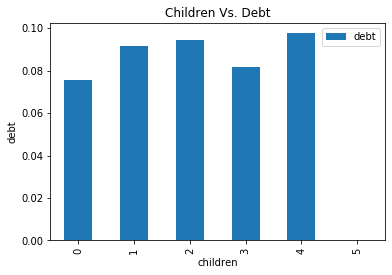

In [47]:
pd.pivot_table(df,index = 'children',values=["debt"], aggfunc = 'mean').plot(kind= 'bar')
plt.xlabel('children') 
plt.ylabel('debt') 
  
# displaying the title
plt.title("Children Vs. Debt")

In [48]:
#checking the corrlation matrix  
#df['children'].corr(df['debt']) # another way to do so
df[['children', 'debt']].corr(method='spearman')

,children,debt
children,1.000000,0.028099
debt,0.028099,1.000000


### Conclusion<a class="anchor" id="section_4_"></a>

People with children and without children seem to both show a relatively large amount of debt. It is shown that people with children such and 1 and 2 kids have a bit more debt overall compared to people with 0 and 3 children. In addition, people with 4 children seem to show have the most debt and are more likely not able to pay their loan back. More generally speaking children cost a lot of money and they will cause you to spend which will result in debt. It is also shown that people with 5 children don't seem to show any debt at all, and this may be because most people dont have 5 kids and if they do its a very small amount. These small amounts are between the average of 1-2 and max 4.

In addition, the correlation matrix table showcase how there is only a 2 percent chance there is a positive correlation between having kids and repaying loans on time. 

- Is there a relation between marital status and repaying a loan on time?

In [49]:
#pivot table
pd.pivot_table(df,index = 'family_status',values=["debt"],aggfunc = 'mean')

,debt
family_status,
civil partnership,0.093040
divorced,0.070411
married,0.075509
unmarried,0.097465
widow / widower,0.065969


Text(0.5, 1.0, 'Family status Vs. Debt')

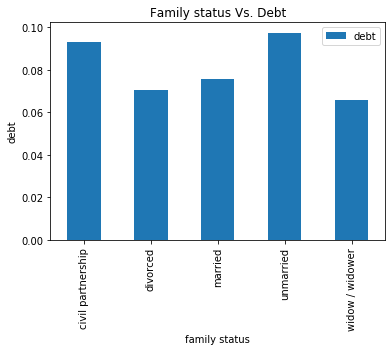

In [50]:
pd.pivot_table(df,index = 'family_status',values=["debt"], aggfunc = 'mean').plot(kind= 'bar')
plt.xlabel('family status') 
plt.ylabel('debt') 
  
# displaying the title
plt.title("Family status Vs. Debt")

### Conclusion<a class="anchor" id="section_4_2"></a>

The relationship between the different marital status and repaying the loan on time shows that all four marriage categories all have loans debts in a relatively high range. But it is the 'unmarried' column which showcases the most debt compared to the other categories followed by 'civil partnership', 'married', ''divorced and 'widowed'. People who are widowers show they are most likely to pay their loans back compared to all other categories. 

The correlation matrix shows there is a 2 percent chance of a positive relationship between family status and debt. 

- Is there a relation between income level and repaying a loan on time?

In [51]:
#pivot table
pd.pivot_table(df,index = 'total_income',values=["debt"], aggfunc = 'mean')

,debt
total_income,
high,0.050000
low,0.081417
medium,0.055970


Text(0.5, 1.0, 'total income Vs. Debt')

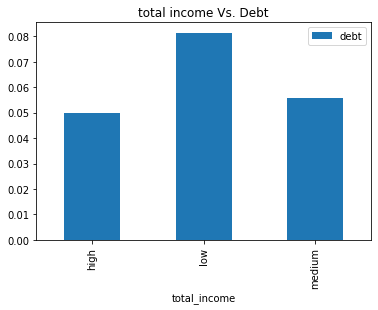

In [52]:
#pivot table
pd.pivot_table(df,index = 'total_income',values=["debt"]).plot(kind= 'bar')
# scatter plot
#df.plot.scatter(x = 'total_income', y = 'debt')
plt.title ("total income Vs. Debt")

### Conclusion<a class="anchor" id="section_4_3"></a>

Low income seems to be the one that has the most debt, which is followed by medium income and high income last. People with higher income are more likely to pay there loans back.

- How do different loan purposes affect on-time repayment of the loan?

In [53]:
#pivot table
pd.pivot_table(df,index = 'purpose',values=["debt"])

,debt
purpose,
car,0.093473
education,0.092296
real estate,0.072397
wedding,0.079050


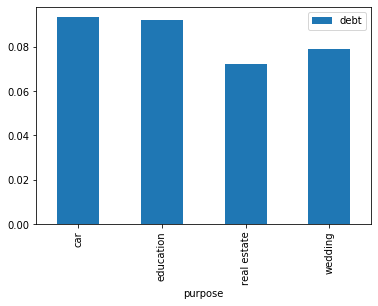

In [54]:
pd.pivot_table(df,index = 'purpose',values=["debt"]).plot(kind= 'bar')

### Conclusion<a class="anchor" id="section_4_4"></a>

People with a purpose of having a car, education which is followed closely by weddings seem to be more debt than buying real estate. Education and car being the main factors for people not repaying their loan on time, and people who take out a loan for real estate will more likely repay their loan on time compared to the other categories. 

## General conclusion<a class="anchor" id="section_5"></a>

For this dataset, we have been able to preprocess the data and clean it for the client, removed duplicates, and categorized the data for them. In addition, there were analysis made for the client based on the column 'purpose', 'total_income', 'children', and 'family_status' against 'debt'. From that analysis, we were able to help the client learn how debt affected this column and if there was a relationship between them.

From the analysis:
- People with more children seem to have more debt and are more likely to not repay their loans. This being people with even 1,2, 4 children will have a hard time paying back there loans then people with 0.
- People who are low income are most likely not going to pay there loan back on time compared to people with high incoem and middle income. 
- For marriage status and loan repayment. People who are unmarried and have civil partnerships are more likely to not pay back and default their loan and people who are in a civil partnership exceeds most loans compared to widowed, and divorced. The widows being more likely to pay back there loans.
- The purpose column shows how people who buy a car and want a loan for education will have more debt and are more likely to default on loan repayment then compared to people who have a real restate which will repay there loan on time.

# Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [x]  file examined;
- [x]  missing values defined;
- [x]  missing values are filled;
- [x]  an explanation of which missing value types were detected;
- [x]  explanation for the possible causes of missing values;
- [x]  an explanation of how the blanks are filled;
- [x]  replaced the real data type with an integer;
- [x]  an explanation of which method is used to change the data type and why;
- [x]  duplicates deleted;
- [x]  an explanation of which method is used to find and remove duplicates;
- [x]  description of the possible reasons for the appearance of duplicates in the data;
- [x]  data is categorized;
- [x]  an explanation of the principle of data categorization;
- [x]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [x]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [x]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [x]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [x]  conclusions are present on each stage;
- [x]  a general conclusion is made.